# 군집


- 클러스터라는 그룹으로 분할하여 어느 클러스터에 속할지를 예측함
>- K - menas clustering (K-평균 군집)
>- 임의의 클러스터 중심에 데이터 포인트를 선택.
>- 다른 포인트와 거리를 계산해서 가장 가까운 곳으로 클러스터 선택..
>- 평균 내서 클러스터 중심을 옮김

In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn


from sklearn.decomposition import NMF
from sklearn.decomposition import PCA


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

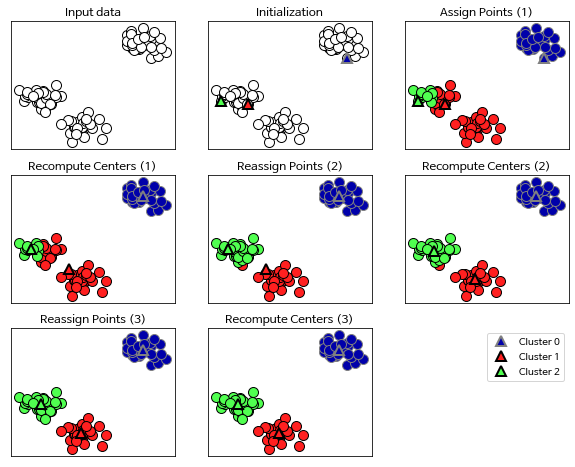

In [2]:
mglearn.plots.plot_kmeans_algorithm()

1. 초기 데이터 포인트 선택
2. 가까운 클러스터 중심으로 포인트에 클러스터 할당
3. 클러스터별 평균으로 중심을 옮긴 후 2번으로
4. 만약 중심이 그대로라면 연산을 멈춤

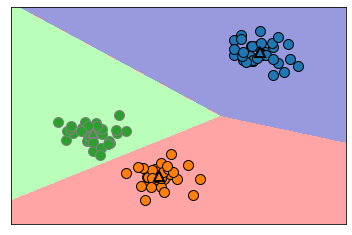

In [3]:
mglearn.plots.plot_kmeans_boundaries()

## KMeans

- n_clusters = 8  / 클러스터 수
- init='k-means++' / 클러스터 중심의 초기값이 가능한 서로 멀리 떨어지도록
- n_init = 10 / 다른 중심으로 시행해볼 횟수.. 
- max_iter = 300 / 한 번 돌아갈때의 최대 반복 횟수
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


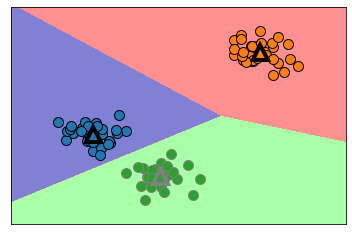

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
# make blobs로 클래스 3, 특성 2, 샘플 100개짜리 데이터셋을 생성


kmeans = KMeans(n_clusters=3) # 클러스터 3개로
kmeans.fit(X)
print(kmeans.labels_)


mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, 'o', s=10)
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1], 
                         [0,1,2], 
                         markers = '^', 
                         markeredgewidth=4,
                          s=15)


mglearn.plots.plot_2d_classification(kmeans, X, alpha=.5)

클러스터 레이블이 (0, 1, 2)가 무작위 할당이라서 번호 할당이 매번 초기화된다...

Text(0.5, 1.0, 'n_cluster=5')

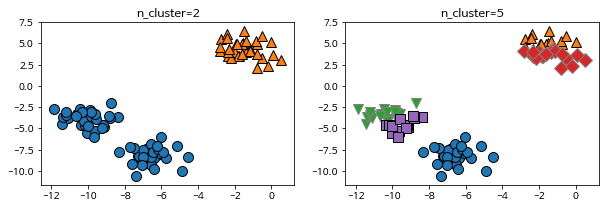

In [5]:
fig, axes = plt.subplots(1,2,figsize=(10,3))

kmeans2 = KMeans(n_clusters = 2).fit(X)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans2.labels_, ax=axes[0])
axes[0].set_title("n_cluster=2")

kmeans5 = KMeans(n_clusters = 5).fit(X)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans5.labels_, ax=axes[1])
axes[1].set_title("n_cluster=5")

클러스터 수에 따른 결과.. 둘 사이 차이가 큼. 클러스터가 몇 개인지 알 수 없는 상황이기 때문에 선정이 어려움


Text(0.5, 1.0, 'K-평균')

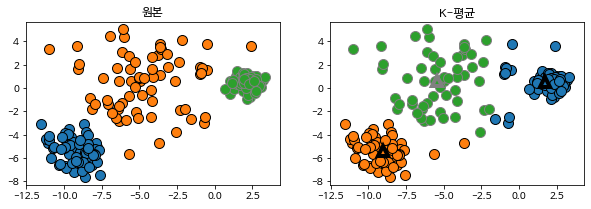

In [6]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
X_var, y_var = make_blobs(n_samples=200, 
                         random_state=170,
                         cluster_std=[1.0, 2.5, 0.5]) #클러스터의 표준편차 설정

mglearn.discrete_scatter(X_var[:,0], X_var[:,1], y_var, 'o', ax=axes[0])
axes[0].set_title("원본")
kmeans_var = KMeans(n_clusters=3, random_state=0).fit(X_var)

mglearn.discrete_scatter(X_var[:,0], X_var[:,1], kmeans_var.labels_,
                         ax=axes[1], 
                         markers='o')
mglearn.discrete_scatter(kmeans_var.cluster_centers_[:,0],
                         kmeans_var.cluster_centers_[:,1], 
                         [0,1,2], 
                         ax=axes[1], 
                         markers = '^', 
                         markeredgewidth=4)

axes[1].set_title("K-평균")

- 표준편차를 1.0, 2.5, 0.5로 바꿔서 데이터셋을 생성
- kmeans로 구한 결과를 보니 분류가 잘못된 포인터가 있음
- 모든 클러스터의 반경이 같다고 생각하기 때문에 다음과 같을 경우 멀더라도 반경에 포함되는 상황이 발생

(600, 2) (2, 2)


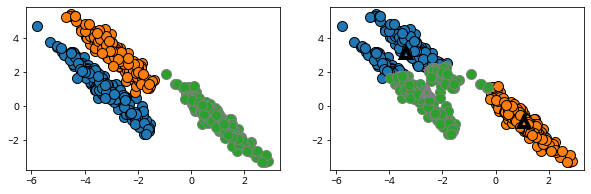

In [7]:
fig, axes = plt.subplots(1,2,figsize=(10,3))

X_c, y_c = make_blobs(n_samples=600, random_state=170)

datas  = np.random.RandomState(74).normal(size=(2,2))
# uniform은 0~1 / normal은 정규분포의 표준 0 표준편차 1의 데이터


print(X_c.shape, datas.shape)

X_c = np.dot(X_c, datas)

kmeans_c = KMeans(n_clusters=3).fit(X_c)
mglearn.discrete_scatter(X_c[:,0], X_c[:,1], y_c, 'o', ax=axes[0])

mglearn.discrete_scatter(X_c[:,0], X_c[:,1], kmeans_c.labels_,
                         ax=axes[1], 
                         markers='o')
mglearn.discrete_scatter(kmeans_c.cluster_centers_[:,0],
                         kmeans_c.cluster_centers_[:,1], 
                         [0,1,2], 
                         ax=axes[1], 
                         markers = '^', 
                         markeredgewidth=4)

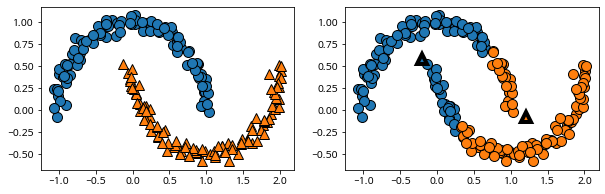

In [8]:
fig, axes = plt.subplots(1,2,figsize=(10,3))

from sklearn.datasets import make_moons
X_m, y_m = make_moons(n_samples=200, random_state=0, noise=0.05)

kmeans_m = KMeans(n_clusters=2).fit(X_m)
mglearn.discrete_scatter(X_m[:,0], X_m[:,1], y_m, ax=axes[0])

mglearn.discrete_scatter(X_m[:,0], X_m[:,1], kmeans_m.labels_,
                         ax=axes[1], 
                         markers='o')
mglearn.discrete_scatter(kmeans_m.cluster_centers_[:,0],
                         kmeans_m.cluster_centers_[:,1], 
                         [0,1], 
                         ax=axes[1], 
                         markers = '^', 
                         markeredgewidth=4)

방향을 고려하지 않기 때문에 클러스터가 원형이 아닌 위와 같은 대각선와 반달형 데이터는 잘 구별하지 못함

- 전체 클러스터가 몇 개인지 모름
- 클러스터 수에 따라 위와 같이 결과가 달라짐


>- 클러스터 수를 명시적으로 결정해야하는 것이 한계
>- 클러스터 중심이 하나여서 둥근 형태라고 봄
>- 반경이 동일하다고 보며 멀리 떨어진 포인트들도 클러스터로 포함됨
>- 방향을 고려하지 않고 거리만 고려한다...
>- 지도학습이 아니라 레이블의 번호가 랜덤하다

요즘은 자동으로 클러스터 갯수를 정해주는 방법이 연구된다고 함


# 벡터 양자화

- 연속적인 값을 그룹화해서 대표값으로 표현
- pca와 nmf는 성분들의 합으로 표현하고 k평균은 클러스터 중심 하나로 표현
- k-평균을 각 포인트가 하나의 성분으로 분해되는 관점으로 보는게 벡터 양자화

In [3]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=.7, color=False)
image_shape = people.images[0].shape

datas = people.data
img = people.images

mask = np.zeros(datas.shape[0], dtype = np.bool)

print("클래스 = " ,np.unique(people.target).shape)

for i in np.unique(people.target):
    mask[np.where(people.target==i)[0][:50]] = 1
    
X_people = datas[mask]
y_people = people.target[mask]

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,
                                                   random_state=42,
                                                   stratify =y_people)

print(X_train.shape, X_test.shape)

클래스 =  (62,)
(1547, 5655) (516, 5655)


people 데이터를 클래스별 50개까지 자르고 훈련, 테스트 데이터로 나눔

In [10]:

nmf = NMF(n_components=100, random_state=0, max_iter=1000, tol=1e-2).fit(X_train)
pca = PCA(n_components=100, random_state=0).fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0).fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

In [11]:
print(X_test.shape)
print(nmf.transform(X_test).shape)
print(X_reconstructed_nmf.shape)

print(X_test[5])
print(X_reconstructed_nmf[5])

print(pca.components_.shape)
print(pca.transform(X_test).shape)
print(X_reconstructed_pca.shape)
print(X_reconstructed_kmeans.shape)

(516, 5655)
(516, 100)
(516, 5655)
[144.       144.66667  142.66667  ...  84.666664  87.666664  89.333336]
[152.63419  157.8951   160.7744   ...  93.77223   96.339874  93.29592 ]
(100, 5655)
(516, 100)
(516, 5655)
(516, 5655)


#### 재구성 데이터
nmf, pca로 transform하면 컴포넌트 수를 100으로 설정해뒀기 때문에 (테스트 세트의 샘플수, 100) 의 결과가 나온다

- nmf 는 inverse_transform으로 100에서 5655로 다시 역변환 한 것이고 (이는 한 번 transform 과정을 거쳤기 때문에 기존의 테스트 세트 데이터와 다름)
- pca는 테스트 세트 변환 (516, 100) * (100, 5655) 로 (516, 5655)를 만듦
- kmeans는 클러스터의 중심값을 사용

1. nmf, pca, kmeans로 훈련 데이터를 fit
2. reconstructed. 재구성하는데
>- nmf는 

Text(0, 0.5, 'nmf')

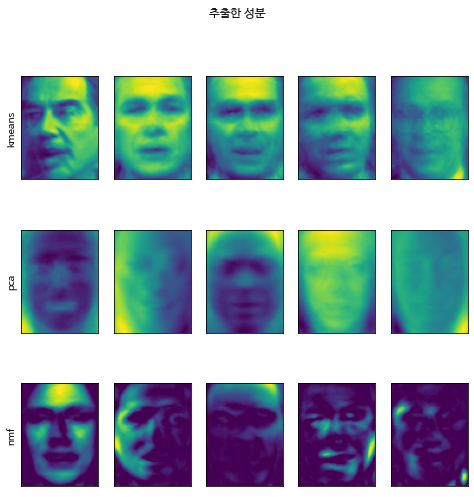

In [12]:
fig, axes = plt.subplots(3,5,figsize=(8,8), subplot_kw={'xticks':(), 'yticks':()})

fig.suptitle("추출한 성분")

for ax, comp_k, comp_p, comp_n,in zip(axes.T,  # 세로로 사용
                                     kmeans.cluster_centers_,
                                      pca.components_,
                                      nmf.components_
                                     ):
    ax[0].imshow(comp_k.reshape(image_shape))
    ax[1].imshow(comp_p.reshape(image_shape))
    ax[2].imshow(comp_n.reshape(image_shape))
    
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")


모델들로 추출한 데이터.

- kmeans는 클러스터 중심들이고 pca와 nmf는 성분들임

(516, 5655)
(516, 5655)
(516, 5655)


Text(0, 0.5, 'nmf')

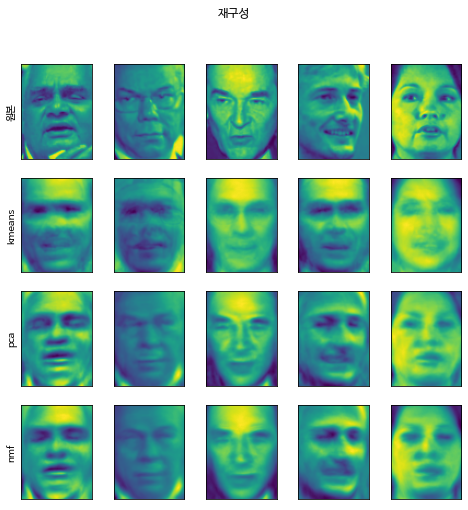

In [13]:
fig, axes = plt.subplots(4,5,figsize=(8,8), subplot_kw={'xticks':(), 'yticks':()})

fig.suptitle("재구성")

print(X_reconstructed_kmeans.shape)
print(X_reconstructed_pca.shape)
print(X_reconstructed_nmf.shape)

for ax, ori, rec_k, rec_p, rec_n,in zip(axes.T,  # 세로로 사용
                                     X_test,
                                     X_reconstructed_kmeans,
                                     X_reconstructed_pca,
                                     X_reconstructed_nmf
                                     ):
    ax[0].imshow(ori.reshape(image_shape))
    ax[1].imshow(rec_k.reshape(image_shape))
    ax[2].imshow(rec_p.reshape(image_shape))
    ax[3].imshow(rec_n.reshape(image_shape))

axes[0,0].set_ylabel("원본")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")



재구성한 데이터를 출력

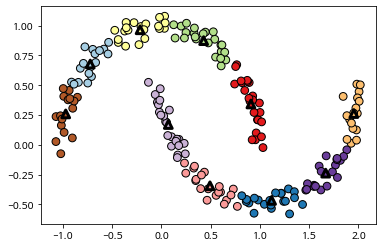

In [14]:
X, y = make_moons(n_samples = 200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.predict(X),
           s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           c = range(kmeans.n_clusters), cmap = 'Paired', edgecolors='black',
           linewidth=3, s=60, marker='^')


- make moons를 클러스터 10개로 나눔.
- 샘플수 200, 클러스터 10
- 각 포인트와 클러스터 사이의 거리로 유효한 데이터를 만들수 있는데 그게 바로 transform의 결과

In [15]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태 : ", distance_features.shape)
print("클러스터 거리 : ")
print(distance_features)

클러스터 거리 데이터의 형태 :  (200, 10)
클러스터 거리 : 
[[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


- 샘플수 200 * 클러스터 10 해서 200, 10의 형태를 가지게 된다.
- 각 포인트의 10개의 클러스터까지의 거리를 담은 결과

# 병합 군집

- 데이터가 하나의 클러스터가
- 지정된 클러스터가 될 때까지 가까운 두 클러스터를 병합

- AgglomerativeClustering
- linkage / 
> 1. ward, 클러스터 내 분산을 가장 작게 증가시키는 두 클러스터
> 2. average, 클러스터 포인트 사이 평균 거리가 가장 작은 두 클러스터
> 3. complete, 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터

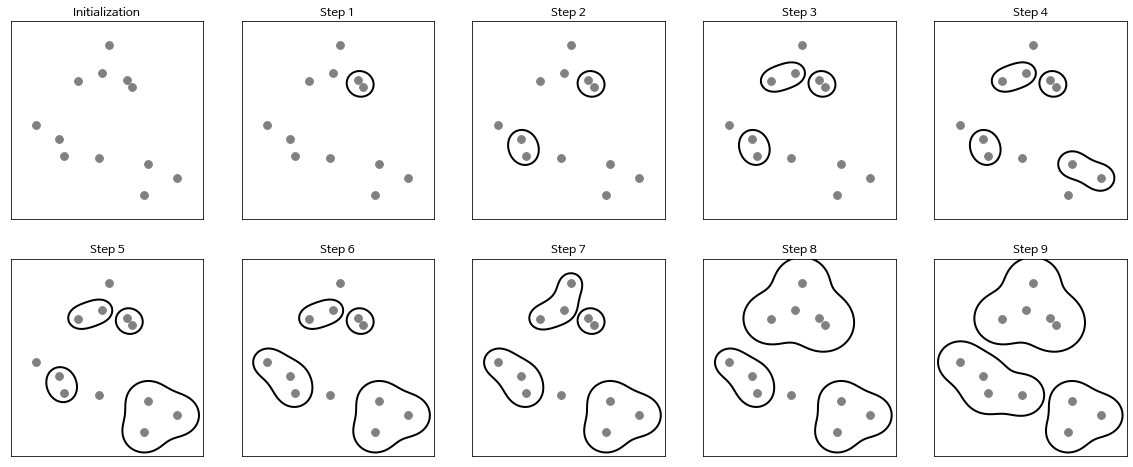

In [16]:
mglearn.plots.plot_agglomerative_algorithm()

두 클러스터씩을 합치면서 결국 목표한 3개 클러스터까지 병합을 함

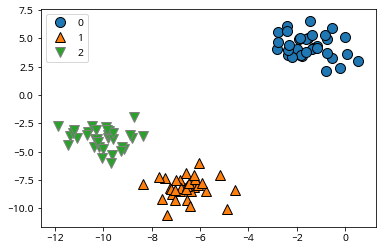

In [4]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(X)
# fit메소드에서 찾은 labels_를 반환
# predict는 불가능. 데이터 분석만 사용 가능함 > 새 포인트 예측 불가

mglearn.discrete_scatter(X[:,0], X[:,1], assign)
plt.legend()

make blobs로 테스트. 결과적으로 군집이 잘 이뤄진것을 확인함

# 계층적 군집

- 병합군집으로 계층적 군집을 만듦
- 병합되는 과정...
- 클러스터 개수 선정에 도움이 되는데 2차원에만 사용 가능하고 moon 데이터 등은 어려움

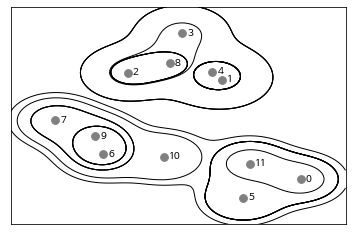

In [18]:
mglearn.plots.plot_agglomerative()

[[ 3.54934659  0.6925054 ]
 [ 1.9263585   4.15243012]
 [ 0.0058752   4.38724103]
 [ 1.12031365  5.75806083]
 [ 1.7373078   4.42546234]
 [ 2.36833522  0.04356792]
 [-0.49772229  1.55128226]
 [-1.4811455   2.73069841]
 [ 0.87305123  4.71438583]
 [-0.66246781  2.17571724]
 [ 0.74285061  1.46351659]
 [ 2.49913075  1.23133799]]
[[ 1.          4.          0.3320945   2.        ]
 [ 6.          9.          0.64580193  2.        ]
 [ 2.          8.          0.92683223  2.        ]
 [ 0.         11.          1.1803787   2.        ]
 [ 5.         15.          1.30311575  3.        ]
 [ 7.         13.          1.4440339   3.        ]
 [ 3.         14.          1.60041812  3.        ]
 [12.         18.          2.07815795  5.        ]
 [10.         17.          2.15981886  4.        ]
 [16.         20.          6.55024854  7.        ]
 [19.         21.          7.92446877 12.        ]]
(11, 4)


Text(0, 0.5, '클러스터 거리')

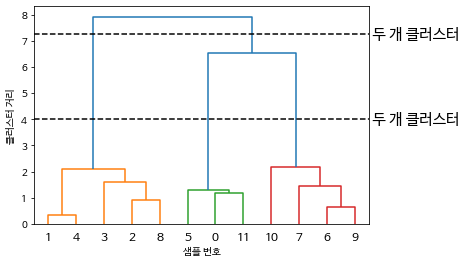

In [5]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

print(X)

linkage_array=ward(X)
print(linkage_array)
print(linkage_array.shape)
# X에 대한 연결 배열. 
# 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열
# 데이터로 봐서
# 연결된 클러스터 2개, 사이 거리, 결합된 클러스터 수


dendrogram(linkage_array)
#위의 연결 배열로 덴드로그람 그리기!

ax=plt.gca()
bounds = ax.get_xbound()
# plt.xlime()과 같음
# x축 처음, x축 끝을 반환.


#수평 점선 긋기
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')


ax.text(bounds[1], 7.25, ' 두 개 클러스터', va = 'center', fontdict={'size':15})
ax.text(bounds[1], 4, ' 두 개 클러스터', va = 'center', fontdict={'size':15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

- y축 길이에 따라서 클러스터 사이의 거리 차이를 볼 수 있음
- 파란선의 길이로 보아서 노랑, 초록, 빨강으로 처음 결합된 것들과 다른 색상 클러스터와의 거리가 상당히 먼 것을 확인 가능
- 아래서부터 병합이 시작됐다고 보면 됨
- 처음 1, 4가 결합.
- 다음 6,9가 결합.
- linkage 출력을 보아도 뒤로 갈수록 3번째 컬럼값이 커지고 후반부에 가서는 그 차이가 심해진 것을 볼 수 있음
- 마지막에는 19와 21이 7.9길이 차이와 함께 결합되며 총 1개의 클러스터. 그 안의 결합 수는 12개인 결과를 볼 수 있음

# DBSCAN


- 클러스터 개수를 미리 지정할 필요 없음
- 복잡한 형상에도 적용하고 노이즈 포인트를 구분한다
- 연산이 많아서 k-평균이나 병합 군집보다 느림
- 새로운 포인트에 대해서는 예측을 못함
- densitiy base

- 밀도에 따라 클러스터를 연결
- Core points : eps 거리 내에 min_samples 수만큼 존재
- Eps : 같은 클러스터로 분류 될 수 있는 두 샘플 사이의 최대 거리
- min_samples : 한 포인트에 대해 같은 클러스터로 분류될 최소 샘플 수
- border points : 이웃과 코어 포인트를 공유함 - eps내에 min_samples가 부족
- noise points : 코어 포인트를 공유하는 이웃 포인트가 없음

In [6]:
from sklearn.cluster import DBSCAN
# eps, min_samples 가 DBSCAN 결정

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
#eps = 0.5, min_samples = 5 기본

clusters = dbscan.fit_predict(X)
# AgglomerativeClustering 과 마찬가지로 예측이 불가능하여 predict를 쓸 수 없음

print("클러스터 레이블 : ", clusters)

클러스터 레이블 :  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


12개 샘플이 -1로 모두 노이즈 포인트

In [21]:
for e in [0.5, 1.0, 1.5, 2.0, 3.0]:
    print('min_samples = 2, eps = ', e)
    clusters = DBSCAN(min_samples = 1, eps=e).fit_predict(X)
    print(clusters)

min_samples = 2, eps =  0.5
[ 0  1  2  3  1  4  5  6  7  8  9 10]
min_samples = 2, eps =  1.0
[0 1 1 2 1 3 4 4 1 4 5 6]
min_samples = 2, eps =  1.5
[0 1 1 1 1 0 2 2 1 2 2 0]
min_samples = 2, eps =  2.0
[0 1 1 1 1 0 0 0 1 0 0 0]
min_samples = 2, eps =  3.0
[0 0 0 0 0 0 0 0 0 0 0 0]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


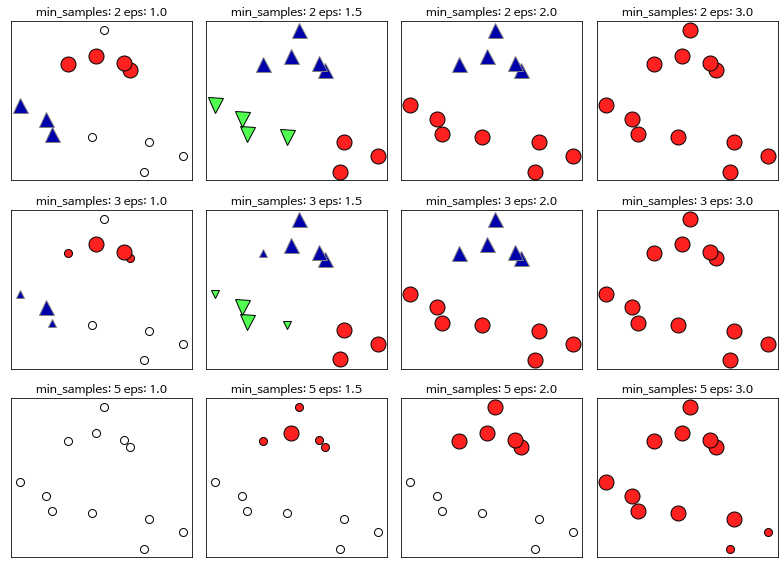

In [22]:
mglearn.plots.plot_dbscan()

- min_samples가 줄어드니까 클러스터가 생성. 클러스터 갯수가 많음
- eps가 커지면서 하나의 클러스터로 합쳐짐 - eps=3
- min samples = 5, eps = 1.5일때 노이즈 증가. 코어 포인트는 하나고 나머지는 다 경계포인트

### min_samples
- 커지면 핵심 포인트가 줄어들고 노이즈는 증가한다



### eps
- 크면 하나의 클러스터로 합쳐지고
- 아주 작으면 핵심 포인트가 없을 수 있다 > 모두 노이즈 포인트
- 더 중요한 파라미터
- 스탠다드나 민맥스 스케일러로 특성 스케일 조정 필요가 있음

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


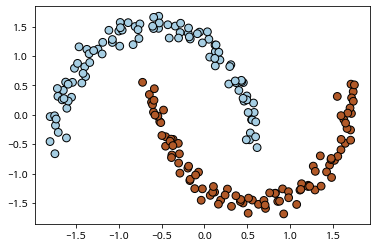

In [9]:
X, y = make_moons(n_samples=200, random_state=0, noise=0.05)

dbscan = DBSCAN()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)
clusters = dbscan.fit_predict(X_scaled)
print(clusters)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='Paired', s=60,
           edgecolors='black')


평군 0, 분산 1이 되도록 스케일 조정

0.5일 경우 클러스터를 잘 분류함

[ 0  1  2 -1  3  3  0  1  0  1  6  4  3  1  5  0  6  4  6  6  3  1  6  1
  6  4  3  3  4  6  0 -1  1  2  6  3  4  0  5  2  1  6  6  4  1  6  0  5
  4  1  6  4  3 -1  1  6  6  1  6  6  4  5  3  0  1  5  6  1  6  5  1  5
  1 -1  1  5  2  0  6  1  3  6  1  3  2  6  0  6  1  3  6  0  3  6  3  3
  3  4  5  4 -1  3  6  0  5  2  5  6  1  6  6  6  6  5  0  1  6  3  1  0
  0  5  2  6  2  5  0  4  1  3  0  6  5  4  1  3  1  5  3  0  4  2  6  6
  6  0  4  1  6  2  1  1  0  6  1  6  1  4  6  6  4  1  6  1  1  3  6  1
  1  1  6 -1  5  5  4  1  3  5  5  6  1  5  3  1  3  6  6  1  5  6  5  6
  0  0  2  6  3  4  6  3]


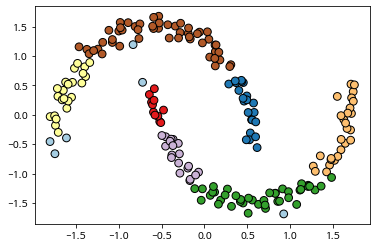

In [24]:
clusters = DBSCAN(eps=0.2).fit_predict(X_scaled)
print(clusters)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='Paired', s=60,
           edgecolors='black')


0.2로 폭을 줄이니 클러스터가 많이 늘었고 노이즈가 생김

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


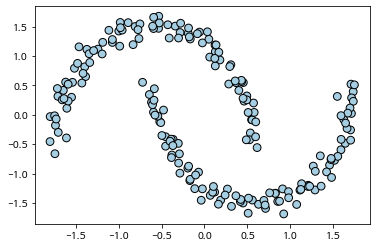

In [25]:
clusters = DBSCAN(eps=0.7).fit_predict(X_scaled)
print(clusters)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='Paired', s=60,
           edgecolors='black')


더 커지니 하나의 클러스터로 뭉쳐짐

# 군집 평가


- 군집이 얼마나 잘 형성됐는지 평가
- 군집 간 분산 최대화, 군집 내 분산 최소화
- 지도학습 accuracy score로 평가 불가능
- 타겟이 있으면 RI(Rand index), ARI(Adjusted rand index), NMI
- 타겟이 없으면 실루엣 계수 




- silhouette_score
- adjusted_rand_score

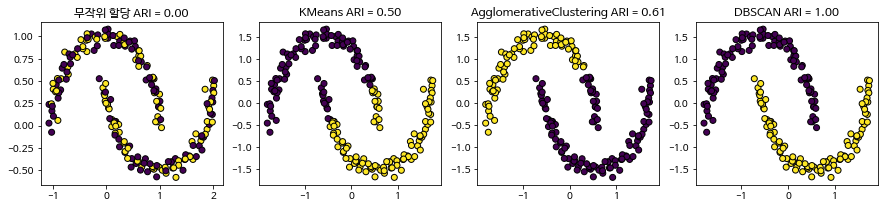

In [26]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2)
agg = AgglomerativeClustering(n_clusters=2)
dbscan = DBSCAN()

random_clusters = np.random.RandomState(0).randint(0, 2, size=len(X))


fig,axes = plt.subplots(1,4,figsize=(15,3))

model = [kmeans, agg, dbscan]

axes[0].set_title("무작위 할당 ARI = {:.2f}".format(adjusted_rand_score(y, random_clusters)))
axes[0].scatter(X[:,0], X[:,1], c=random_clusters, cmap = 'viridis',  edgecolor='black')

for m, ax in zip(model, axes[1:]):
    labels = m.fit_predict(X_scaled)
    ax.set_title('{} ARI = {:.2f}'.format(m.__class__.__name__, adjusted_rand_score(y, labels)))
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap = 'viridis', edgecolor='black')

- 무작위 할당은 0점이고
- kmeans는 클러스터를 원형으로 보기 때문에 반달형 데이터에 약하고 0.5
- Agglomerative는 0.6
- dbscan의 경우 밀도를 반영하기 때문에 1로 잘 분류했다

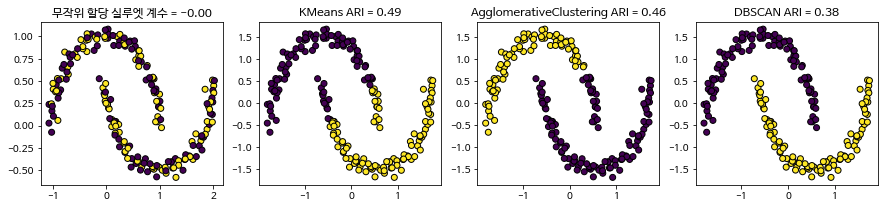

In [27]:
from sklearn.metrics.cluster import silhouette_score

random_clusters = np.random.RandomState(0).randint(0, 2, size=len(X))

fig,axes = plt.subplots(1,4,figsize=(15,3))

axes[0].set_title("무작위 할당 실루엣 계수 = {:.2f}".format(silhouette_score(X, random_clusters)))
axes[0].scatter(X[:,0], X[:,1], c=random_clusters, cmap = 'viridis',  edgecolor='black')

for m, ax in zip(model, axes[1:]):
    labels = m.fit_predict(X_scaled)
    ax.set_title('{} ARI = {:.2f}'.format(m.__class__.__name__, silhouette_score(X_scaled, labels)))
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap = 'viridis', edgecolor='black')

타겟값이 (여기에서는 y)가 없을때 실루엣 계수로 밀집도를 계산하는데 복잡한 모양은 잘 평가가 안됨

- dbscan이 여기선 오히려 값이 떨어진다.. 

In [28]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_people)

print("dbscan 고유 레이블 : ", np.unique(labels))

dbscan = DBSCAN(min_samples = 3)
labels = dbscan.fit_predict(X_people)

print("dbscan min_samples = 3 고유 레이블 : ", np.unique(labels))

dbscan = DBSCAN(min_samples = 3, eps = 15)
labels = dbscan.fit_predict(X_people)

print("dbscan min_samples = 3, eps = 15 고유 레이블 : ", np.unique(labels))
print("클러스터별 포인트 수 : ", np.bincount(labels+1)) # bincount는 0부터 가능해서 -1 노이즈 포인트를 0으로 옮김

dbscan = DBSCAN(min_samples = 3, eps = 20)
labels = dbscan.fit_predict(X_people)

dbscan 고유 레이블 :  [-1]
dbscan min_samples = 3 고유 레이블 :  [-1]
dbscan min_samples = 3, eps = 15 고유 레이블 :  [-1]
클러스터별 포인트 수 :  [2063]


원본 데이터 그대로 적용함

- 연산이 매우 느리다
- 아래 pca 결과와 다르게 3, 20에서도 전부 노이즈 처리됨.
- 원본이기 때문에 그 차이가 심해서 제대로 클러스터가 안 찾아짐

In [14]:
pca = PCA(n_components = 100, random_state=0, whiten=True)
X_pca = pca.fit_transform(X_people)

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)

print("dbscan 고유 레이블 : ", np.unique(labels))

dbscan = DBSCAN(min_samples = 3)
labels = dbscan.fit_predict(X_pca)

print("dbscan min_samples = 3 고유 레이블 : ", np.unique(labels))

dbscan = DBSCAN(min_samples = 3, eps = 15)
labels = dbscan.fit_predict(X_pca)

print("dbscan min_samples = 3, eps = 15 고유 레이블 : ", np.unique(labels))
print("클러스터별 포인트 수 : ", np.bincount(labels+1)) # bincount는 0부터 가능해서 -1 노이즈 포인트를 0으로 옮김

dbscan = DBSCAN(min_samples = 3, eps = 20)
labels = dbscan.fit_predict(X_pca)

print("dbscan min_samples = 3, eps = 20 고유 레이블 : ", np.unique(labels))
print("클러스터별 포인트 수 : ", np.bincount(labels+1)) # bincount는 0부터 가능해서 -1 노이즈 포인트를 0으로 옮김

dbscan 고유 레이블 :  [-1]
dbscan min_samples = 3 고유 레이블 :  [-1]
dbscan min_samples = 3, eps = 15 고유 레이블 :  [-1  0]
클러스터별 포인트 수 :  [  32 2031]
dbscan min_samples = 3, eps = 20 고유 레이블 :  [0]
클러스터별 포인트 수 :  [   0 2063]


- default dbscan eps = 0.5, min_samples=5로 했을때 전부 노이즈로 분류함
- min_samples를 줄임. 여전히 노이즈
- eps를 늘림. 15에서 0으로 분류되는 것이 생김
- 20으로 늘리니 노이즈는 전부 제거되고 하나의 클러스터로 통합됨

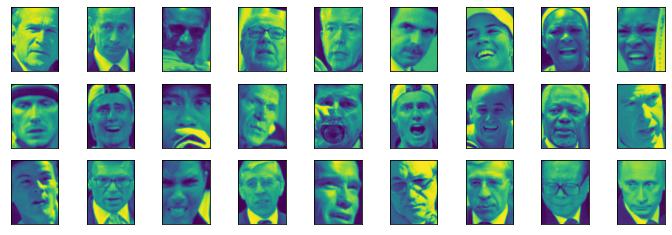

In [30]:
dbscan = DBSCAN(min_samples = 3, eps = 15)
labels = dbscan.fit_predict(X_pca)

noise = X_people[labels==-1] # 노이즈 포인터를 가지는 people에 대한 데이터

fig, axes = plt.subplots(3,9, figsize=(12,4), subplot_kw  = {'xticks':(), 'yticks':()})

for i, ax in zip(noise, axes.ravel()):
    ax.imshow(i.reshape(image_shape))

min samples = 3, eps = 15 일때 노이즈로 분류되는 데이터들

- 너무 가깝거나 모자 등으로 일부가 가려진 경우임

In [31]:
for eps in [1,3,5,7,9,11,13]:
    print("eps = ", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수 : ", len(np.unique(labels)))
    print("클러스터 크기: ", np.bincount(labels+1))

eps =  1
클러스터 수 :  1
클러스터 크기:  [2063]
eps =  3
클러스터 수 :  1
클러스터 크기:  [2063]
eps =  5
클러스터 수 :  1
클러스터 크기:  [2063]
eps =  7
클러스터 수 :  14
클러스터 크기:  [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]
eps =  9
클러스터 수 :  4
클러스터 크기:  [1307  750    3    3]
eps =  11
클러스터 수 :  2
클러스터 크기:  [ 413 1650]
eps =  13
클러스터 수 :  2
클러스터 크기:  [ 120 1943]


eps에 따른 결과

- 5까진 전부 노이즈로 처리
- 7부터는 다른 클러스터가 생기는데 많이 분리돼서 생김
- 11부터는 한 클러스터로 모이고 더 커질수록 노이즈가 클러스터에 포함됨

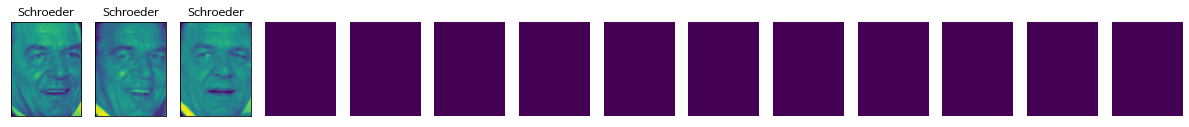

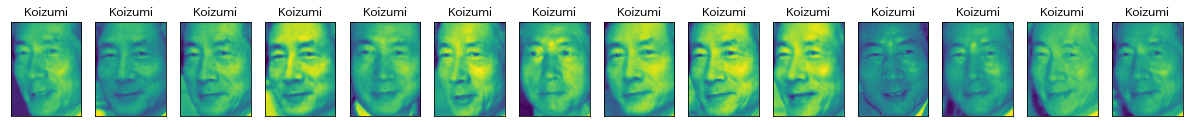

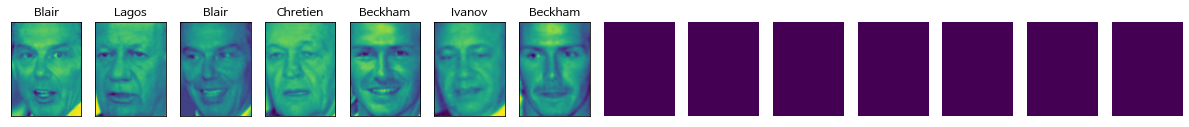

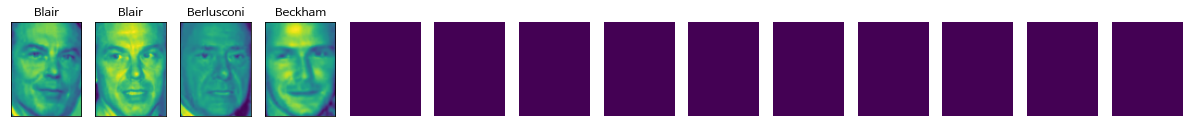

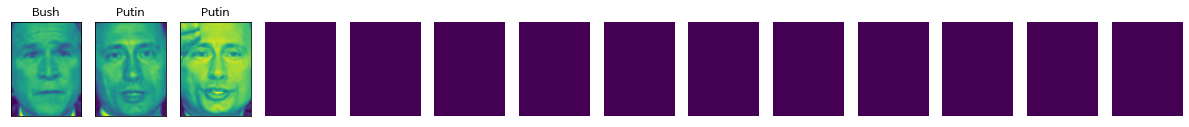

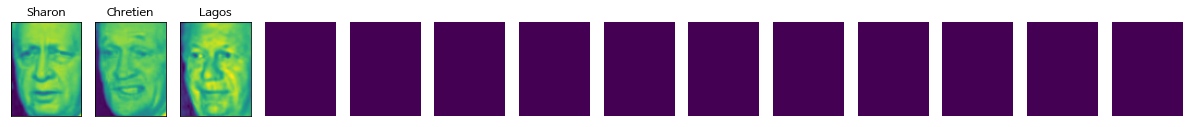

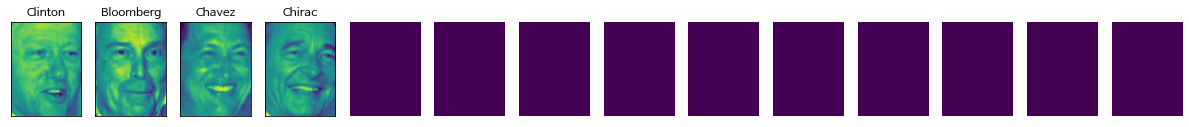

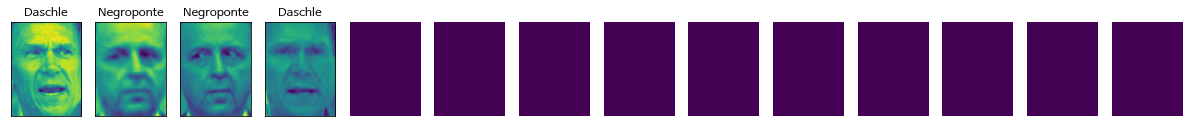

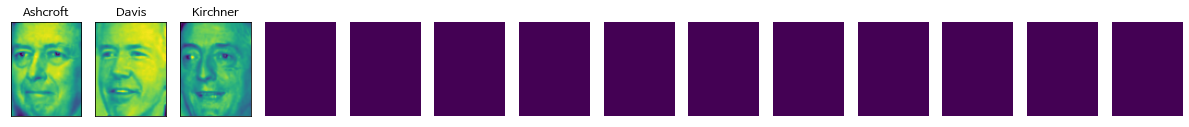

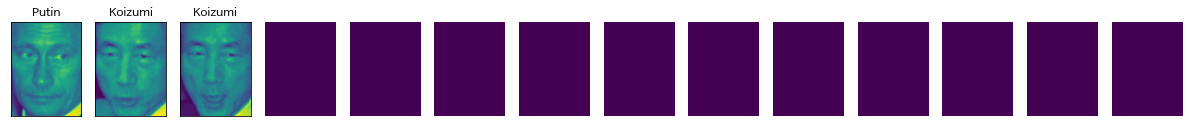

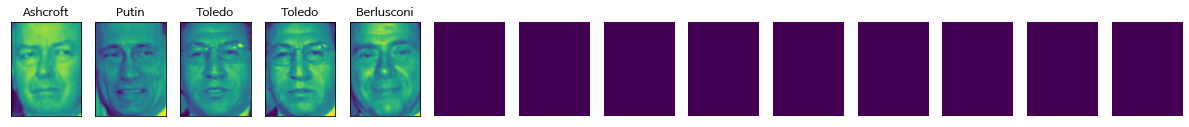

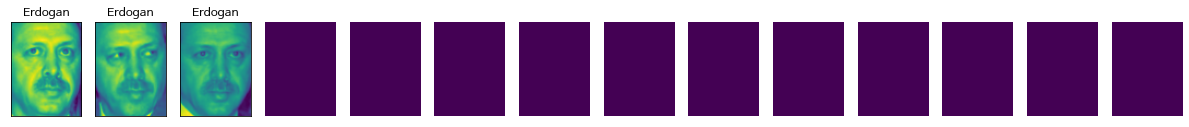

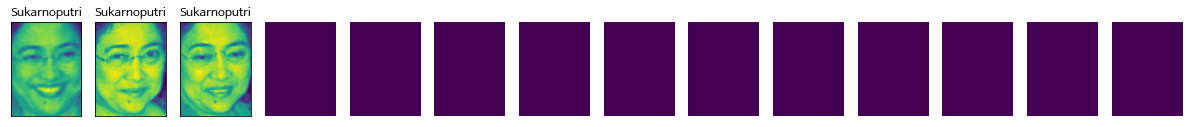

In [16]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(len(np.unique(labels))-1): # eps=7에서 클러스터 수. noise빼기
    mask = labels==cluster # 해당 클러스터면
    n_images = np.sum(mask) # n번째 클러스터에 n_images개의 이미지가 포함
    
    fig,axes = plt.subplots(1,14,figsize=(14*1.5, 4),
                           subplot_kw= {'xticks':(), 'yticks':()})
    i=0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1]) # 성만 뽑아서.
        i+=1
    for j in range(len(axes)-i): #남은 부분 off
        axes[j+i].imshow(np.array([[1]*65]*87))
        axes[j+i].axis('off')
    

잘 분류한 클러스터도 있고 섞인 클러스터도 있다. 섞인 것들은 얼굴의 각도가 유사함

k-means 클러스터 크기 :  [282 226 105 268 151 324 202 208 208  89]
(10, 100)
(5655,)


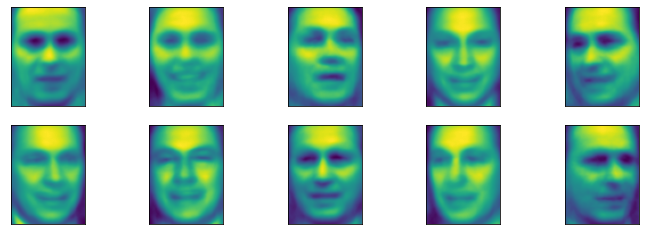

In [17]:
kmeans = KMeans(n_clusters = 10, random_state=0)
labels = kmeans.fit_predict(X_pca)

print("k-means 클러스터 크기 : ", np.bincount(labels))

fig, axes=plt.subplots(2,5,figsize=(12,4),
                           subplot_kw= {'xticks':(), 'yticks':()})

print(kmeans.cluster_centers_.shape)
print(pca.inverse_transform(kmeans.cluster_centers_[0]).shape)

for image, ax in zip(kmeans.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(image).reshape(image_shape)) # pca로 변환한거에 kmeans를 적용해서 다시 바꿔줘야함
    

pca로 변환한 것에 kmeans적용. 클러스터 10개로 지정해서 찾은 클러스터 중심

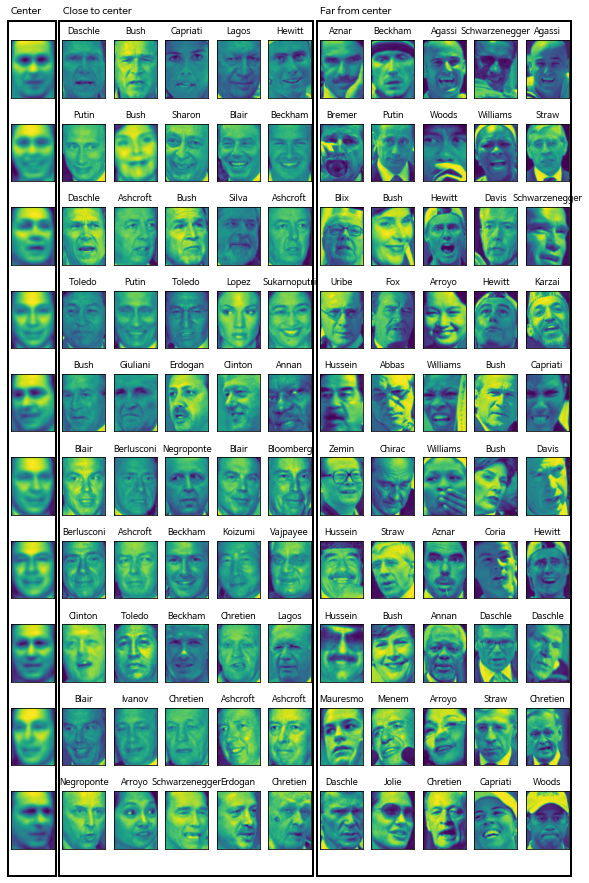

In [18]:
mglearn.plots.plot_kmeans_faces(kmeans, pca, X_pca, X_people, y_people, people.target_names)

kmeans의 클러스터 센터와 가까운 데이터, 먼 데이터들

- 가까운 데이터는 비슷한 각도
- 먼 데이터는 클러스터 중심과 딱히 공통점을 찾을 수 없음
- 같은 클러스터임에도 다른 이유는 dbscan과 달리 kmeans는 노이즈란 개념이 없어서 어찌됐든 어딘가에 속하니까

### plot_kmeans_faces

- imshow의 기본이 cmap='viridis'로 설정됐기 때문에 vmin=0, vmax=1로 설정하면 이미지가 노란색으로만 찬다..
- anaconda3\Lib\site-packages\mglearn\plot_kmeans.py 에 위 함수 속 vmin설정 코드를 지워서 기본 viridis로 출력함

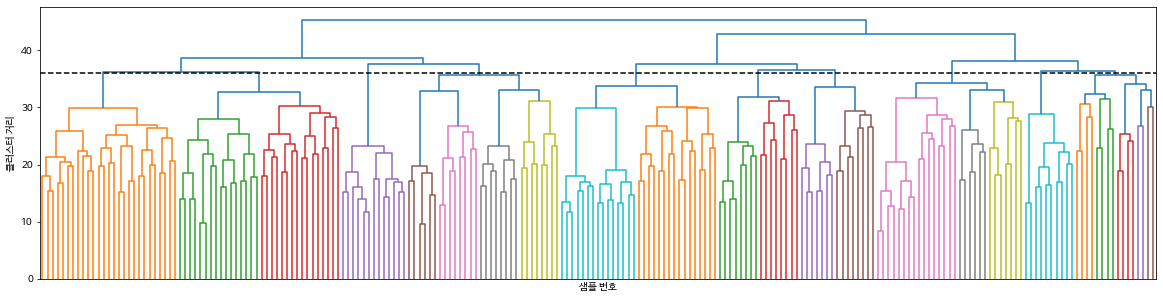

In [35]:
linkage = ward(X_pca)

plt.figure(figsize=(20,5))
dendrogram(linkage, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax=plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36,36], '--',c='k')

dendrogram으로 출력함

- X_pca에 총 2000개가 넘는 데이터가 있기 때문에 p=7로 트리 깊이를 제한함
- 36. 클러스터가 10개가 되는 지점에 수직선
- 클러스터를 자르는 선이 애매 - 클러스터간의 거리 차이도 크지 않음...